In [2]:
# Microscopy Exercise Figure
from google.colab import drive
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

In [3]:
#Google Drive
drive.mount('/content/drive')

# Path to folder on Drive
base_path = "/content/drive/MyDrive/TP"

#Define images (Image1, Image2, Image3, Image4)
img_paths = {
    1: os.path.join(base_path, "Image1"),
    2: os.path.join(base_path, "Image2"),
    3: os.path.join(base_path, "Image3"),
    4: os.path.join(base_path, "Image4"),
}


Mounted at /content/drive


In [3]:

#Captions for each microscopy type
captions = {
    1: "1 — Wide-field fluorescence microscopy (D)",
    2: "2 — Confocal laser scanning microscopy (B)",
    3: "3 — Phase-contrast microscopy (A)",
    4: "4 — Bright-field transmission microscopy (C)",
}

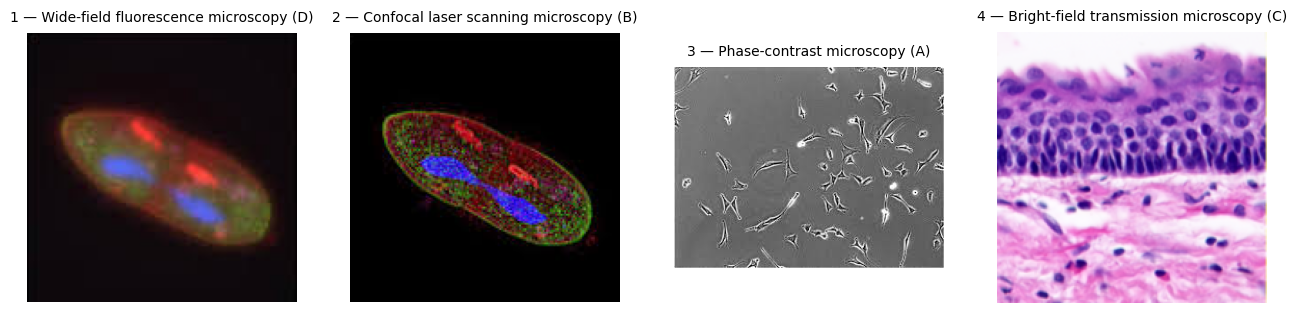

In [5]:
#Display images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes, start=1):
    path = img_paths[i]
    img = None

    # Check for common extension
    for ext in [".jpg", ".jpeg", ".png", ".tif"]:
        if os.path.exists(path + ext):
            img = Image.open(path + ext)
            break

    # Create placeholder if image not found
    if img is None:
        img = Image.fromarray((np.ones((300, 300, 3)) * 255).astype("uint8"))
        ax.text(50, 150, "Missing Image", color="black", fontsize=10)

    ax.imshow(img)
    ax.axis("off")
    ax.set_title(captions[i], fontsize=10, pad=8)

# Task 3

Stack shape: (19, 189, 199)
Data type: uint16
Min: 33 Max: 1969 Mean: 263.3563851001037


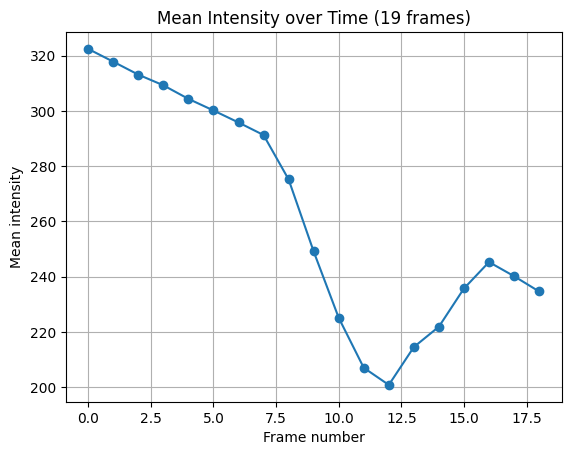

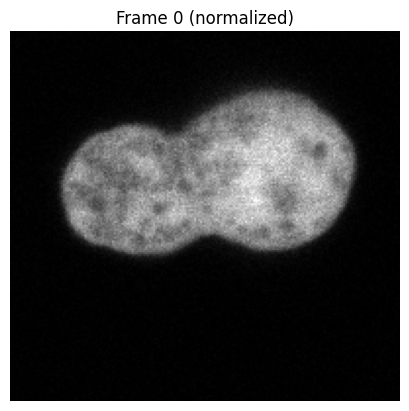

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to your file
path = "/content/drive/MyDrive/TP/cell2D_timelapse.tif"

#Load multi-frame TIFF manually
frames = []
with Image.open(path) as img:
    for i in range(img.n_frames):
        img.seek(i)
        frame = np.array(img)
        frames.append(frame)
stack = np.stack(frames)

print("Stack shape:", stack.shape)
print("Data type:", stack.dtype)
print("Min:", stack.min(), "Max:", stack.max(), "Mean:", stack.mean())

#Compute mean intensity per frame
mean_intensity = stack.mean(axis=(1, 2))

plt.plot(mean_intensity, marker='o')
plt.title("Mean Intensity over Time (19 frames)")
plt.xlabel("Frame number")
plt.ylabel("Mean intensity")
plt.grid(True)
plt.show()

#Display one normalized frame
frame = stack[0]
norm_frame = (frame - frame.min()) / (frame.max() - frame.min() + 1e-9)
plt.imshow(norm_frame, cmap='gray')
plt.title("Frame 0 (normalized)")
plt.axis('off')
plt.show()


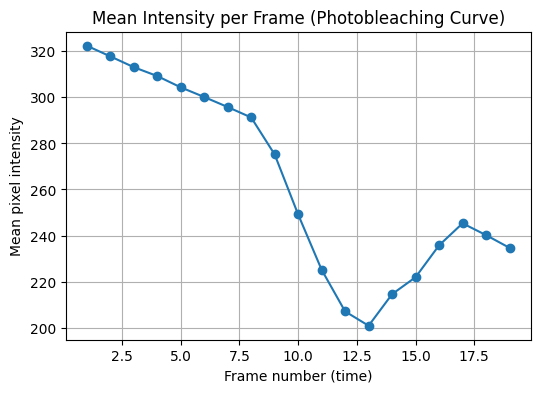

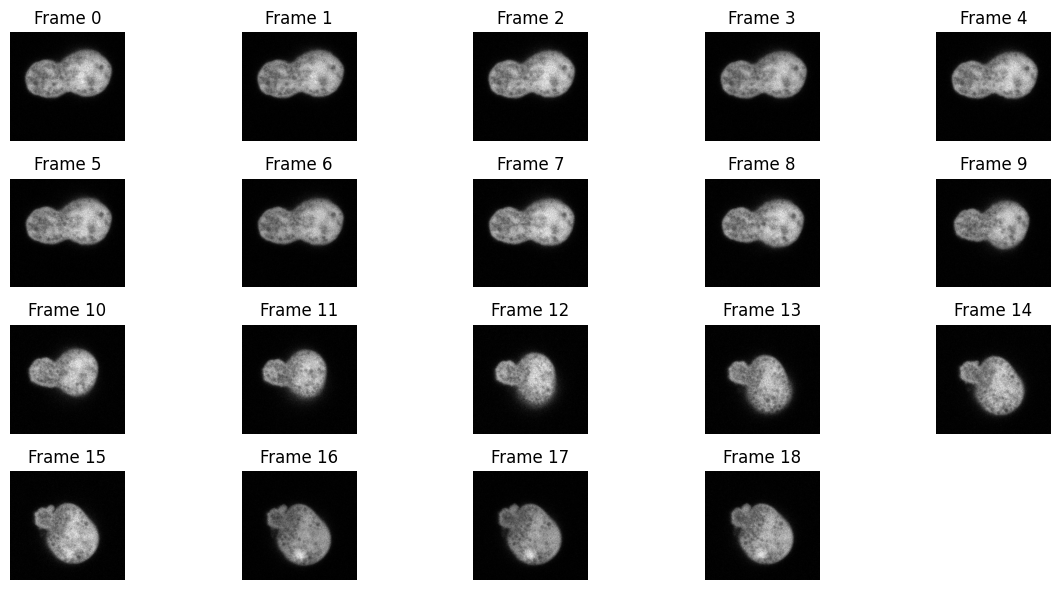

Frame 0: mean intensity = 322.41
Frame 1: mean intensity = 317.80
Frame 2: mean intensity = 313.11
Frame 3: mean intensity = 309.25
Frame 4: mean intensity = 304.34
Frame 5: mean intensity = 300.14
Frame 6: mean intensity = 295.80
Frame 7: mean intensity = 291.26
Frame 8: mean intensity = 275.20
Frame 9: mean intensity = 249.13
Frame 10: mean intensity = 225.13
Frame 11: mean intensity = 207.05
Frame 12: mean intensity = 200.84
Frame 13: mean intensity = 214.55
Frame 14: mean intensity = 221.91
Frame 15: mean intensity = 235.73
Frame 16: mean intensity = 245.30
Frame 17: mean intensity = 240.19
Frame 18: mean intensity = 234.65

Global mean intensity (all frames): 263.36


In [12]:
#Plot mean intensity across all 19 frames
plt.figure(figsize=(6,4))
plt.plot(range(1, len(mean_intensity)+1), mean_intensity, 'o-', color='tab:blue')
plt.title("Mean Intensity per Frame (Photobleaching Curve)")
plt.xlabel("Frame number (time)")
plt.ylabel("Mean pixel intensity")
plt.grid(True)
plt.show()

#visualize all frames as thumbnails
n = len(stack)
cols = 5
rows = int(np.ceil(n / cols))

plt.figure(figsize=(12, 6))
for i in range(n):
    frame = stack[i]
    norm = (frame - frame.min()) / (frame.max() - frame.min() + 1e-9)
    plt.subplot(rows, cols, i+1)
    plt.imshow(norm, cmap='gray')
    plt.title(f"Frame {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Print mean intensity values for each
for i, val in enumerate(mean_intensity):
    print(f"Frame {i}: mean intensity = {val:.2f}")

#Global mean intensity across all frames
global_mean = stack.mean()
print(f"\nGlobal mean intensity (all frames): {global_mean:.2f}")



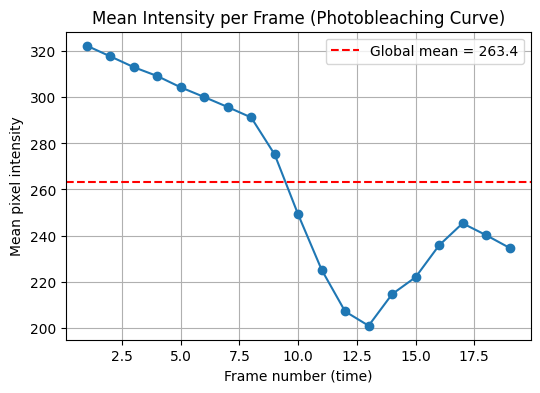

In [13]:
#Global Mean curve
plt.figure(figsize=(6,4))
plt.plot(range(1, len(mean_intensity)+1), mean_intensity, 'o-', color='tab:blue')
plt.axhline(global_mean, color='red', linestyle='--', label=f'Global mean = {global_mean:.1f}')
plt.title("Mean Intensity per Frame (Photobleaching Curve)")
plt.xlabel("Frame number (time)")
plt.ylabel("Mean pixel intensity")
plt.legend()
plt.grid(True)
plt.show()
